In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Bootstrap

### Recap

In [5]:
sf_pop = Table.read_table('data/san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))
# show me the employees with the lowest compensation in sf_pop
sf_pop.sort('Total Compensation', descending = False)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",1404,Clerk,9722,13206.6,0,0,13206.6,3219.28,3287.84,1090.84,7597.96,20804.6
Calendar,2015,4,Community Health,DPH,Public Health,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2800,Public Health,2802,Epidemiologist 1,27475,14374.5,0,0,14374.5,2675.1,2628.26,1127.68,6431.04,20805.5
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,42778,12268.5,724.98,72.03,13065.5,2958.62,3784.34,997.44,7740.4,20805.9
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,790,"SEIU - Miscellaneous, Local 1021",1200,Personnel,1202,Personnel Clerk,26771,13087.3,0,0,13087.3,3376.54,3300.25,1043.37,7720.16,20807.5
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,12714,18189.5,0,1098.31,19287.9,0,0,1525.56,1525.56,20813.4
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1637,Patient Accounts Clerk,34957,14566.3,0,0,14566.3,2710.79,2385.45,1151.75,6247.99,20814.3
Calendar,2015,4,Community Health,DPH,Public Health,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1070,IS Project Director,48821,16143,0,0,16143,2926.74,1433.59,311.74,4672.07,20815.1
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,42660,5558.74,4277.36,9043.44,18879.5,0,494.59,1461.65,1956.24,20835.8
Calendar,2015,5,Culture & Recreation,REC,Recreation and Park Commission,261,"Laborers, Local 261",3400,Agriculture & Horticulture,3410,Apprentice Gardener,49217,12763.9,0,33.75,12797.7,2814.19,4202.23,1024.29,8040.71,20838.4
Calendar,2015,5,Culture & Recreation,REC,Recreation and Park Commission,351,Municipal Executive Association - Miscellaneous,0900,Management,0922,Manager I,50110,2466.3,0,16165.4,18631.7,541.11,238.93,1427.59,2207.63,20839.3


In [3]:
sf_pop.num_rows

35050

/opt/conda/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


Population Median =  112965.15


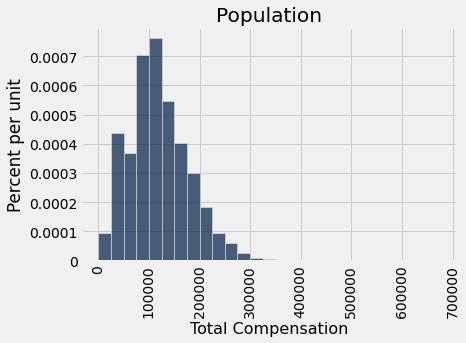

In [4]:
pop_median = percentile(50, sf_pop.column('Total Compensation'))
sf_bins = np.arange(0, 700000, 25000)
sf_pop.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
plots.title('Population');

Population Median =  112965.15
Sample Median =  109004.28


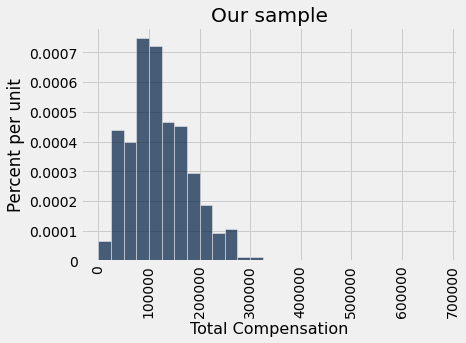

In [6]:
# Random sample of size 300
our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
our_sample.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
print("Sample Median = ", our_sample_median)
plots.title('Our sample');

In [7]:
# Empirical distribution of the sample median
# assuming we can just resample from the population
def one_sample_median():
    single_sample = sf_pop.sample(300, with_replacement = False)
    return percentile(50, single_sample.column('Total Compensation'))

medians = make_array()
for i in np.arange(1000):
    new_median = one_sample_median()
    medians = np.append(medians, new_median)

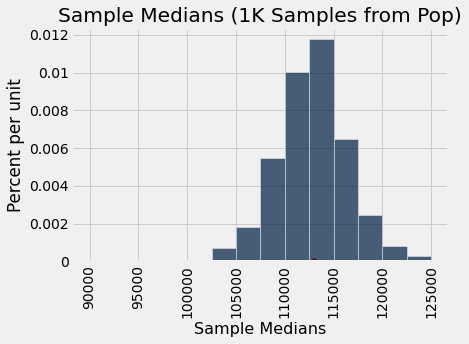

In [8]:
med_bins = np.arange(90000, 125001, 2500)

Table().with_column(
    'Sample Medians', medians
).hist('Sample Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.title('Sample Medians (1K Samples from Pop)');

### Bootstrap

Population Median =        112965.15
Our Sample Median =        109004.28
Bootstrap Sample Median =  106925.35


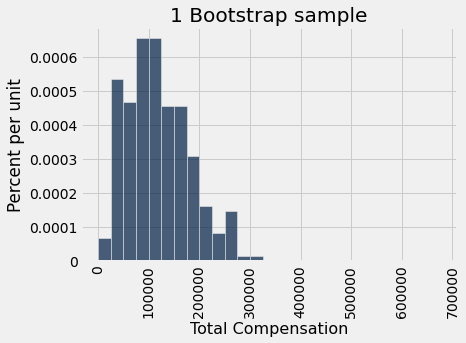

In [13]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

In [14]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

In [26]:
help(Table.sample)

Help on function sample in module datascience.tables:

sample(self, k=None, with_replacement=True, weights=None)
    Return a new table where k rows are randomly sampled from the
    original table.
    
    Args:
        ``k`` -- specifies the number of rows (``int``) to be sampled from
           the table. Default is k equal to number of rows in the table.
    
        ``with_replacement`` -- (``bool``) By default True;
            Samples ``k`` rows with replacement from table, else samples
            ``k`` rows without replacement.
    
        ``weights`` -- Array specifying probability the ith row of the
            table is sampled. Defaults to None, which samples each row
            with equal probability. ``weights`` must be a valid probability
            distribution -- i.e. an array the length of the number of rows,
            summing to 1.
    
    Raises:
        ValueError -- if ``weights`` is not length equal to number of rows
            in the table; or, if ``weig

In [15]:
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

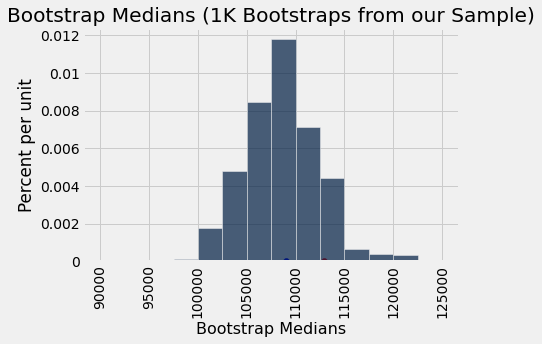

In [16]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

### 95% Confidence Interval

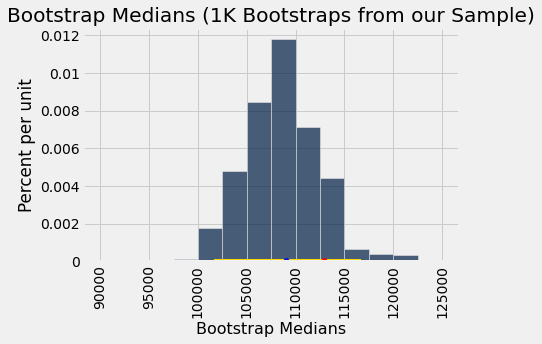

In [18]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=4, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [19]:
# This time we have a sample, but no population data!
births = Table.read_table('data/baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


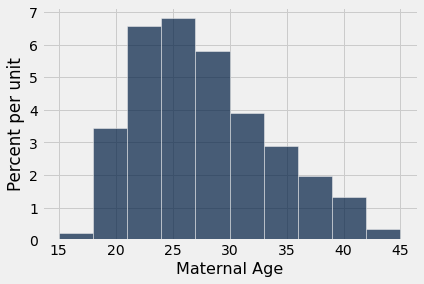

In [20]:
births.hist('Maternal Age')

In [21]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [22]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [23]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

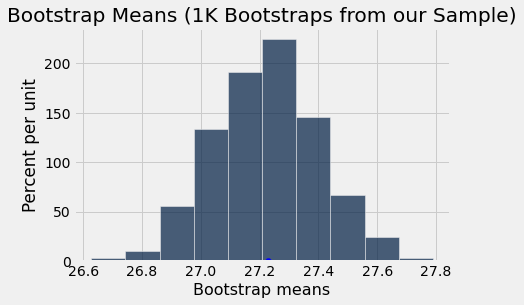

In [24]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');